In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dzero_m21_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 1.75, 1.96)
data = ROOT.RooDataSet("data", "", file.Dzero, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [3]:
## Signal definition: Gaussian 

yield_signal = ROOT.RooRealVar("yield signal", "", 1e4, 0, 1e5)
mean = ROOT.RooRealVar("mean", "", 1.864, 1.830, 1.890)
sigma = ROOT.RooRealVar("sigma", "",  0.011, 0.0, 0.999)

# pdf
gauss = ROOT.RooGaussian("gauss", "", mass, mean, sigma)

In [4]:
## Background definition: Third degree polynomial (p0 x³ + p1 x² + p2 x + 1)

yield_back = ROOT.RooRealVar("yield background", "", 1e5, 0, 1.5e5)
p0 = ROOT.RooRealVar("p0", "", 108.09, 100, 120)
p1 = ROOT.RooRealVar("p1", "", -47.48, -55, -45)
#p2 = ROOT.RooRealVar("p2", "",  -507.63, -550, -450)
#p3 = ROOT.RooRealVar("p3", "", 179.54, 150, 180)

back = ROOT.RooPolynomial("Third degree polynomial", "", mass, ROOT.RooArgList(p0, p1))

#back = ROOT.RooGenericPdf("Third degree polynomial", "", "@1*@0**3 + @2*@0**2 + @3*@0 + @4", ROOT.RooArgList(mass, p0, p1, p2, p3) )
#back = ROOT.RooGenericPdf("Third degree polynomial", "", "@1 * @0**3 + @2 * @0**2, + @3 * @0 + 1", ROOT.RooArgList(mass, p0, p1, p2))

In [5]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss, back),
                       ROOT.RooArgList(yield_signal, yield_back))



In [6]:
result = model.fitTo(data, ROOT.RooFit.Extended(True), ROOT.RooFit.Range(1.75, 1.96))

[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit' created with bounds [1.75,1.96]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'NormalizationRangeForfit' created with bounds [1.75,1.96]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit_nll_model_data' created with bounds [1.75,1.96]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,Third degree polynomial)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm ra

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: png file Dzero_fit.png has been created


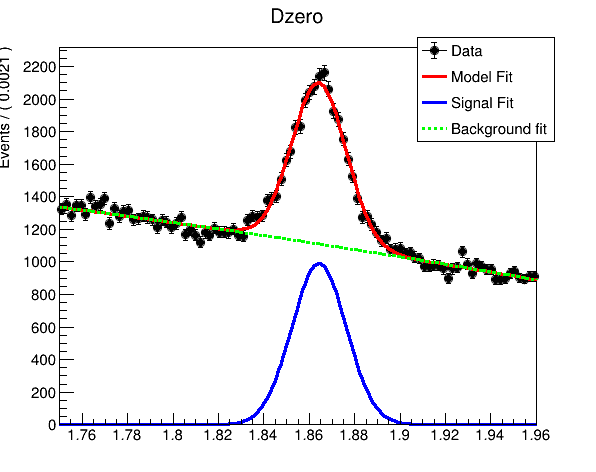

In [48]:
# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

can  = ROOT.TCanvas("can", "histograms   ", 600, 500)

# Frame creation
frame = mass.frame(ROOT.RooFit.Title("Dzero"))

## Plots

# Data
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Model
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

# Signal
model.plotOn(frame, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("gauss"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("Third degree polynomial"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.93, 0.92)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame.findObject("Background"), "Background fit", "L")

frame.Draw()
leg.Draw("same")

can.Draw()

can.SaveAs("Dzero_fit.png")

Info in <TCanvas::Print>: png file test.png has been created
